In [1]:
#! pip install tensorflow
#! pip install scikit-learn




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv("train.csv")

In [3]:
# 대괄호 [ ] 제거
train['URL_clean'] = train['URL'].str.replace(r'[\[\]]', '', regex=True)
train["URL_clean"]

0                                         poznan.wuoz.gov.pl
1                                        vill.okawa.kochi.jp
2                                      nationalfinance.co.om
3                                     town.ozora.hokkaido.jp
4                          open24.ie-news.irish/online/Login
                                 ...                        
6995051                                           ddht.co.kr
6995052                                 www.upstartepoxy.com
6995053    employeesalaryschedule70.000webhostapp.com/adb...
6995054                                       dekalbtool.com
6995055                                   helpinganimals.com
Name: URL_clean, Length: 6995056, dtype: object

In [4]:
train

,ID,URL,label,URL_clean
0,TRAIN_0000000,poznan[.]wuoz[.]gov[.]pl,0,poznan.wuoz.gov.pl
1,TRAIN_0000001,vill[.]okawa[.]kochi[.]jp,0,vill.okawa.kochi.jp
2,TRAIN_0000002,nationalfinance[.]co[.]om,0,nationalfinance.co.om
3,TRAIN_0000003,town[.]ozora[.]hokkaido[.]jp,0,town.ozora.hokkaido.jp
4,TRAIN_0000004,open24[.]ie-news[.]irish/online/Login,1,open24.ie-news.irish/online/Login
...,...,...,...,...
6995051,TRAIN_6995051,ddht[.]co[.]kr,0,ddht.co.kr
6995052,TRAIN_6995052,www[.]upstartepoxy[.]com,0,www.upstartepoxy.com
6995053,TRAIN_6995053,employeesalaryschedule70[.]000webhostapp[.]com...,1,employeesalaryschedule70.000webhostapp.com/adb...
6995054,TRAIN_6995054,dekalbtool[.]com,0,dekalbtool.com


In [ ]:
# url 엔트로피 차수 저장 
import math

def calculate_entropy(url):
    probability = [url.count(c) / len(url) for c in set(url)]
    return -sum(p * math.log(p, 2) for p in probability)


In [23]:
import re

train['dot_count'] = train['URL_clean'].str.count(r'\.')
train['digit_count'] = train['URL_clean'].str.count(r'\d')
train['alpha_count'] = train['URL_clean'].str.count(r'[a-zA-Z]')
train['dash_count'] = train['URL_clean'].str.count(r'-')
train['underscore_count'] = train['URL_clean'].str.count(r'_')
train['digit_count'] = train['URL_clean'].str.count(r'\d')
train['percent_count'] = train['URL_clean'].str.count(r'%')
train['equal_count'] = train['URL_clean'].str.count(r'=')
train['question_count'] = train['URL_clean'].str.count(r'\?')
train['at_count'] = train['URL_clean'].str.count(r'@')
train['subdomain_count'] = train['URL_clean'].str.count(r'\.')
train['length_of_url'] = train['URL_clean'].str.len()
train['path_length'] = train['URL_clean'].str.extract(r'https?://[^/]+(/.*)')[0].str.len()
train['top_level_domain_count'] = train['URL_clean'].str.count(r'\.[a-zA-Z]{2,}')
train['is_ip_in_url'] = train['URL_clean'].apply(lambda x: bool(re.search(r'\b(?:\d{1,3}\.){3}\d{1,3}\b', x)))
train['special_char_count'] = train['URL_clean'].str.count(r'[^a-zA-Z0-9]')
train['count_of_double_slash'] = train['URL_clean'].str.count(r'//')
train['subdomain_to_domain_ratio'] = train['subdomain_count'] / (train['dot_count'] + 1)
train['url_entropy'] = train['URL_clean'].apply(calculate_entropy)
# www 포함 여부
train['has_www'] = train['URL_clean'].str.contains('www')
# suspicious word 포함 여부
suspicious_words = ['login', 'verify', 'update', 'confirm', 'account', 'secure', 'ebayisapi', 'banking']
train['suspicious_word_count'] = train['URL_clean'].apply(lambda x: sum(word in x.lower() for word in suspicious_words))
# 숫자 비율 (전체 길이 대비)
train['digit_ratio'] = train['digit_count'] / (train['length_of_url'] + 1)
# 알파벳 비율
train['alpha_ratio'] = train['alpha_count'] / (train['length_of_url'] + 1)
# 특수문자 비율
train['special_ratio'] = train['special_char_count'] / (train['length_of_url'] + 1)
# path 깊이 (슬래시 개수 기반)
train['path_depth'] = train['URL_clean'].str.count(r'/') - 2  # 도메인 뒤의 / 개수 (http:// 제외)
# 도메인 길이 (host만 추출해서)
train['domain_length'] = train['URL_clean'].str.extract(r'https?://([^/]+)')[0].str.len()
# 숫자 연속 등장 (ex: 1234 같은 경우)
train['has_long_digit_sequence'] = train['URL_clean'].str.contains(r'\d{4,}')
# 하이픈 연속 등장 여부
train['has_multiple_dash'] = train['URL_clean'].str.contains(r'-{2,}')


In [24]:
train

,ID,URL,label,URL_clean,dot_count,digit_count,alpha_count,dash_count,underscore_count,percent_count,...,url_entropy,has_www,suspicious_word_count,digit_ratio,alpha_ratio,special_ratio,path_depth,domain_length,has_long_digit_sequence,has_multiple_dash
0,TRAIN_0000000,poznan[.]wuoz[.]gov[.]pl,0,poznan.wuoz.gov.pl,3,0,15,0,0,0,...,3.308271,False,0,0.000000,0.789474,0.157895,-2,NaN,False,False
1,TRAIN_0000001,vill[.]okawa[.]kochi[.]jp,0,vill.okawa.kochi.jp,3,0,16,0,0,0,...,3.471354,False,0,0.000000,0.800000,0.150000,-2,NaN,False,False
2,TRAIN_0000002,nationalfinance[.]co[.]om,0,nationalfinance.co.om,2,0,19,0,0,0,...,3.272804,False,0,0.000000,0.863636,0.090909,-2,NaN,False,False
3,TRAIN_0000003,town[.]ozora[.]hokkaido[.]jp,0,town.ozora.hokkaido.jp,3,0,19,0,0,0,...,3.533771,False,0,0.000000,0.826087,0.130435,-2,NaN,False,False
4,TRAIN_0000004,open24[.]ie-news[.]irish/online/Login,1,open24.ie-news.irish/online/Login,2,2,26,1,0,0,...,3.772450,False,1,0.058824,0.764706,0.147059,0,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995051,TRAIN_6995051,ddht[.]co[.]kr,0,ddht.co.kr,2,0,8,0,0,0,...,2.921928,False,0,0.000000,0.727273,0.181818,-2,NaN,False,False
6995052,TRAIN_6995052,www[.]upstartepoxy[.]com,0,www.upstartepoxy.com,2,0,18,0,0,0,...,3.684184,True,0,0.000000,0.857143,0.095238,-2,NaN,False,False
6995053,TRAIN_6995053,employeesalaryschedule70[.]000webhostapp[.]com...,1,employeesalaryschedule70.000webhostapp.com/adb...,2,5,41,0,0,0,...,4.130881,False,0,0.098039,0.803922,0.078431,0,NaN,False,False
6995054,TRAIN_6995054,dekalbtool[.]com,0,dekalbtool.com,1,0,13,0,0,0,...,3.324863,False,0,0.000000,0.866667,0.066667,-2,NaN,False,False


In [11]:
features = [col for col in train.columns if col not in ['URL_clean']]
X = train[features]


In [25]:
X


,ID,URL,label,dot_count,digit_count,alpha_count,dash_count,underscore_count,percent_count,equal_count,...,url_entropy,has_www,suspicious_word_count,digit_ratio,alpha_ratio,special_ratio,path_depth,domain_length,has_long_digit_sequence,has_multiple_dash
0,TRAIN_0000000,poznan[.]wuoz[.]gov[.]pl,0,3,0,15,0,0,0,0,...,3.308271,False,0,0.000000,0.789474,0.157895,-2,NaN,False,False
1,TRAIN_0000001,vill[.]okawa[.]kochi[.]jp,0,3,0,16,0,0,0,0,...,3.471354,False,0,0.000000,0.800000,0.150000,-2,NaN,False,False
2,TRAIN_0000002,nationalfinance[.]co[.]om,0,2,0,19,0,0,0,0,...,3.272804,False,0,0.000000,0.863636,0.090909,-2,NaN,False,False
3,TRAIN_0000003,town[.]ozora[.]hokkaido[.]jp,0,3,0,19,0,0,0,0,...,3.533771,False,0,0.000000,0.826087,0.130435,-2,NaN,False,False
4,TRAIN_0000004,open24[.]ie-news[.]irish/online/Login,1,2,2,26,1,0,0,0,...,3.772450,False,1,0.058824,0.764706,0.147059,0,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995051,TRAIN_6995051,ddht[.]co[.]kr,0,2,0,8,0,0,0,0,...,2.921928,False,0,0.000000,0.727273,0.181818,-2,NaN,False,False
6995052,TRAIN_6995052,www[.]upstartepoxy[.]com,0,2,0,18,0,0,0,0,...,3.684184,True,0,0.000000,0.857143,0.095238,-2,NaN,False,False
6995053,TRAIN_6995053,employeesalaryschedule70[.]000webhostapp[.]com...,1,2,5,41,0,0,0,0,...,4.130881,False,0,0.098039,0.803922,0.078431,0,NaN,False,False
6995054,TRAIN_6995054,dekalbtool[.]com,0,1,0,13,0,0,0,0,...,3.324863,False,0,0.000000,0.866667,0.066667,-2,NaN,False,False


In [26]:
y = train['label']


In [27]:
print(train.dtypes[train.dtypes == 'object'])  # 문자열 컬럼 확인

ID               object
URL              object
URL_clean        object
path_length      object
domain_length    object
dtype: object


In [28]:
# bool 컬럼들을 int로 변환
bool_cols = [
    'has_www', 'is_ip_in_url',
    'has_long_digit_sequence', 'has_multiple_dash'
]

for col in bool_cols:
    if col in train.columns:
        train[col] = train[col].astype(int)

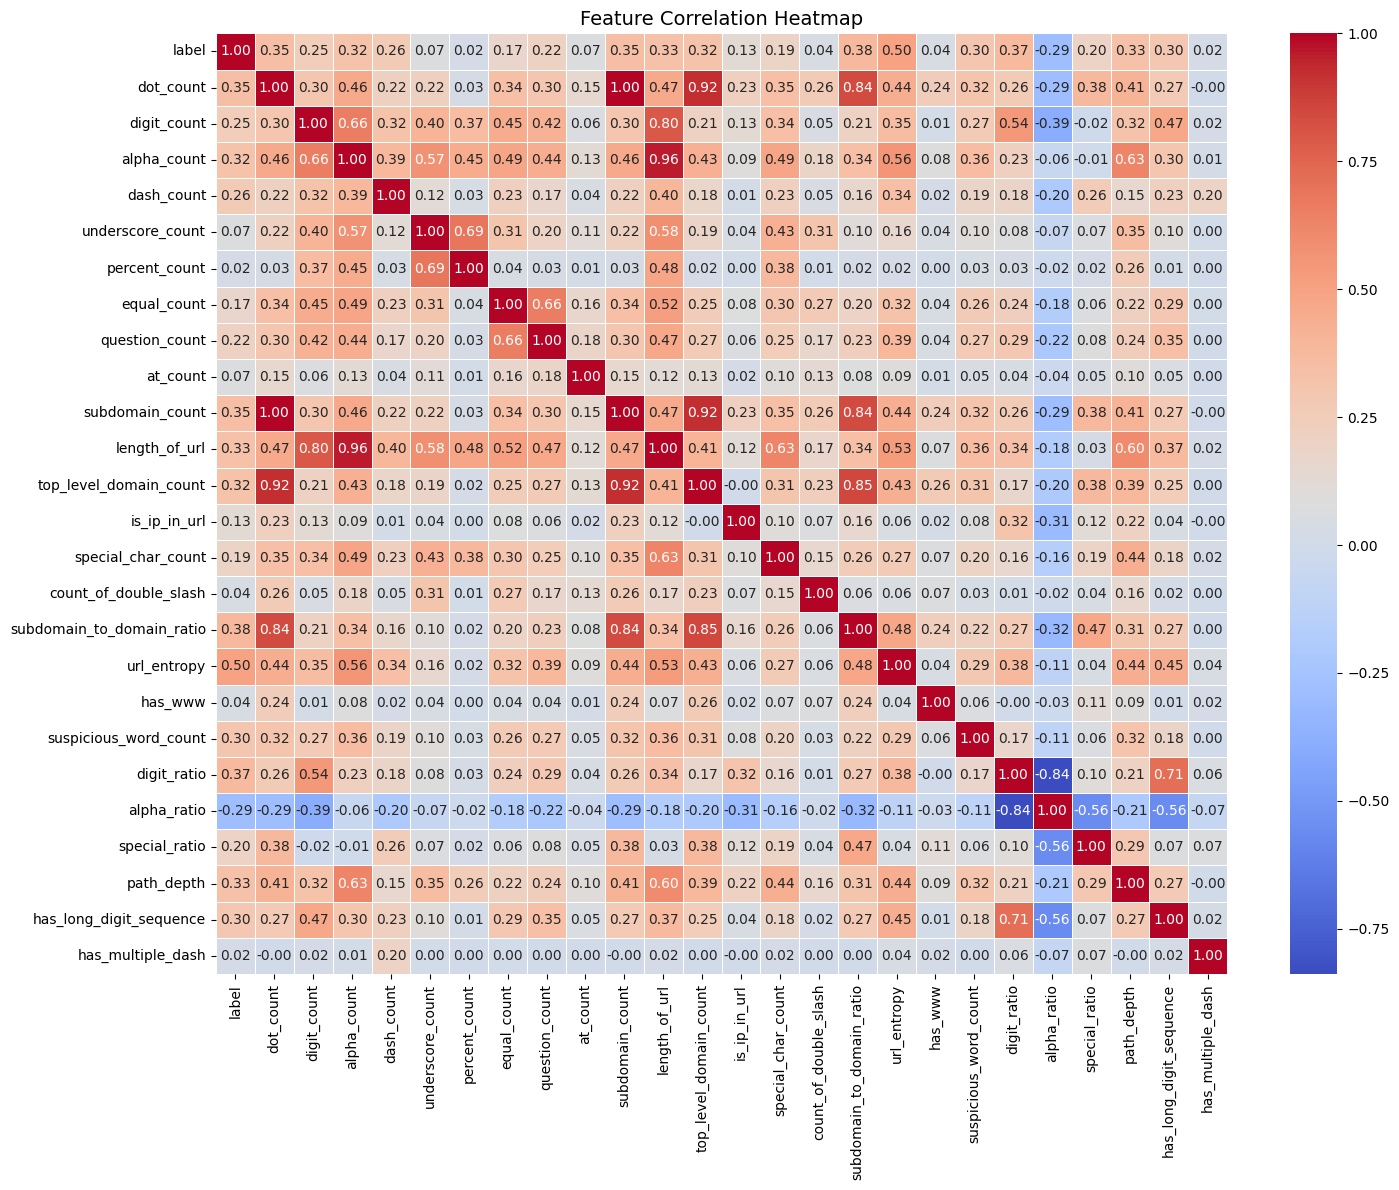

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 숫자형 컬럼만 가져오고 has_https, label 포함
features = [col for col in train.columns 
            if train[col].dtype in ['int64', 'float64'] 
            and col not in ['has_https']]

# 2. 상관계수 계산
corr_df = train[features].corr()


# 4. 히트맵 그리기
plt.figure(figsize=(15, 12))
sns.heatmap(data=corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [25]:
from sklearn.preprocessing import MinMaxScaler

# 정규화로 변경
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
from sklearn.model_selection import train_test_split

# 1단계: 전체에서 테스트 세트 먼저 떼어내기 (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 2단계: 남은 80% 중에서 훈련 / 검증으로 다시 나누기 (검증 20% = 전체의 16%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# input_dim 자동 설정
model = Sequential()
model.add(Dense(64, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\human\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# 모델 컴파일
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
# EarlyStopping 콜백을 사용하여 검증 손실이 개선되지 않으면 학습을 멈추도록 설정
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100)

In [20]:
# 모델 평가
from sklearn.metrics import accuracy_score
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy:.4f}')

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 10, but received input with shape (None, 9)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 9), dtype=float32)
  • training=False
  • mask=None

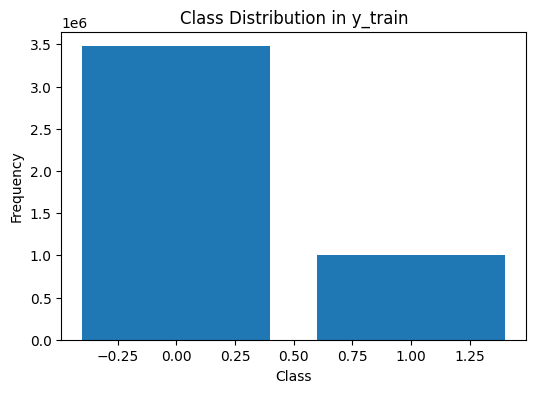

In [52]:
from collections import Counter

# y_train의 클래스 분포 시각화
plt.figure(figsize=(6,4))
plt.bar(*zip(*Counter(y_train).items()))  # y_train의 클래스 값과 빈도수로 막대 그래프
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in y_train')
plt.show()


In [53]:
from imblearn.under_sampling import RandomUnderSampler

# 언더샘플링 적용
rus = RandomUnderSampler(random_state=42)

# X_train과 y_train을 언더샘플링하여 균형 맞추기
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# 언더샘플링 후 클래스 분포 확인
print("After undersampling:", Counter(y_train_under))

After undersampling: Counter({0: 1001534, 1: 1001534})


In [54]:
from collections import Counter

print(Counter(y_test))


Counter({0: 1086032, 1: 312980})


In [55]:
from sklearn.metrics import f1_score, accuracy_score

# 확률 예측값이 y_val_proba라고 가정
# 예: y_val_proba = model.predict(X_val).ravel()

# 0.1 ~ 0.89 범위에서 0.01 간격으로 threshold 후보 생성
thresholds = np.arange(0.1, 0.9, 0.01)

# 각 threshold마다 F1 점수 계산
threshold_range = [i * 0.01 for i in range(100)]
f1_scores = []
accuracies = []
thresholds = []

y_val_proba = model.predict(X_val).flatten()

for t in thresholds:
    y_pred = (y_val_proba > t).astype(int)  # 임계값 기준으로 이진 분류
    score = f1_score(y_val, y_pred)
    f1_scores.append(score)
    acc = accuracy_score(y_val, y_pred)   

for t in [i * 0.01 for i in range(100)]:
    y_pred = (y_val_proba > t).astype(int)

    try:
        f1 = f1_score(y_val, y_pred)
        acc = accuracy_score(y_val, y_pred)

        thresholds.append(t)         # 여기서 같이 append!
        f1_scores.append(f1)
        accuracies.append(acc)
    except:
        continue

34976/34976 ━━━━━━━━━━━━━━━━━━━━ 26s 733us/step


In [56]:
# 최고 F1 점수 기준 인덱스
best_idx = f1_scores.index(max(f1_scores))
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
best_acc = accuracies[best_idx]  

print(f"Best Threshold: {best_threshold:.2f}")

print(f"Best F1 Score: {best_f1:.4f}")
print(f"Accuracy at Best Threshold: {best_acc:.4f}")

Best Threshold: 0.37
Best F1 Score: 0.7157
Accuracy at Best Threshold: 0.8697


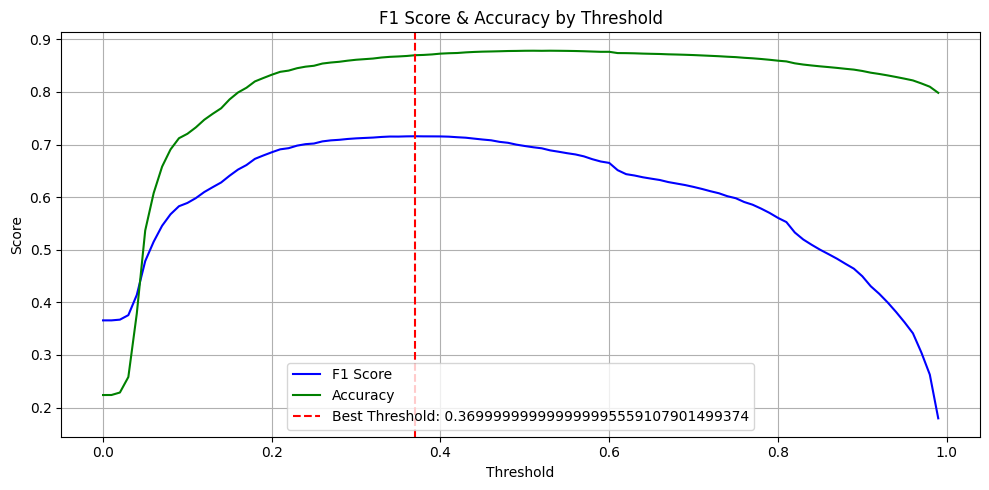

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plt.plot(thresholds, accuracies, label='Accuracy', color='green')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best Threshold: {best_threshold:0.33f}')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("F1 Score & Accuracy by Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
# 테스트 데이터 예측 확률
y_test_proba = model.predict(X_test).ravel()

# 최적 임계값 적용해서 예측값 변환
y_test_pred = (y_test_proba > best_threshold).astype(int)



43720/43720 ━━━━━━━━━━━━━━━━━━━━ 30s 689us/step


In [47]:
y_test_pred = model.predict(X_test)  # 테스트 데이터에 대해 예측
y_test_pred = (y_test_pred > 0.3).astype(int)  # 이진 분류이므로 0.5를 기준으로 0과 1로 변환

# 성능 평가
from sklearn.metrics import accuracy_score, roc_auc_score

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_test_proba))

43720/43720 ━━━━━━━━━━━━━━━━━━━━ 30s 691us/step
Test Accuracy: 0.22371502174391641
Test ROC AUC: 0.614620308469829


In [59]:
# 모델 학습 (Epoch마다 정확도 출력)
history = model.fit(X_train, y_train, 
                    epochs=5,               # 최대 epoch 수
                    batch_size=32,            # 배치 크기
                    validation_data=(X_val, y_val),  # 검증 데이터
)

Epoch 1/5
139902/139902 ━━━━━━━━━━━━━━━━━━━━ 256s 2ms/step - accuracy: 0.8780 - loss: 0.3032 - val_accuracy: 0.8784 - val_loss: 0.3013
Epoch 2/5
 24535/139902 ━━━━━━━━━━━━━━━━━━━━ 2:45 1ms/step - accuracy: 0.8777 - loss: 0.3033

KeyboardInterrupt: 

Classification Report:

              precision    recall  f1-score   support

           0       0.79      1.00      0.88    868826
           1       1.00      0.10      0.18    250383

    accuracy                           0.80   1119209
   macro avg       0.89      0.55      0.53   1119209
weighted avg       0.84      0.80      0.73   1119209



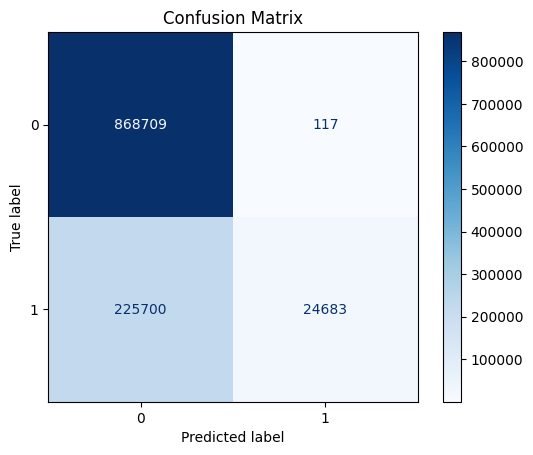

In [58]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay




# 평가 지표 출력
print("Classification Report:\n")
print(classification_report(y_val, y_pred))

# 혼동 행렬 시각화
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
